### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [44]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [45]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [46]:
initial_data.shape[0] == processed_data.shape[0]

True

In [47]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [48]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [49]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [50]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

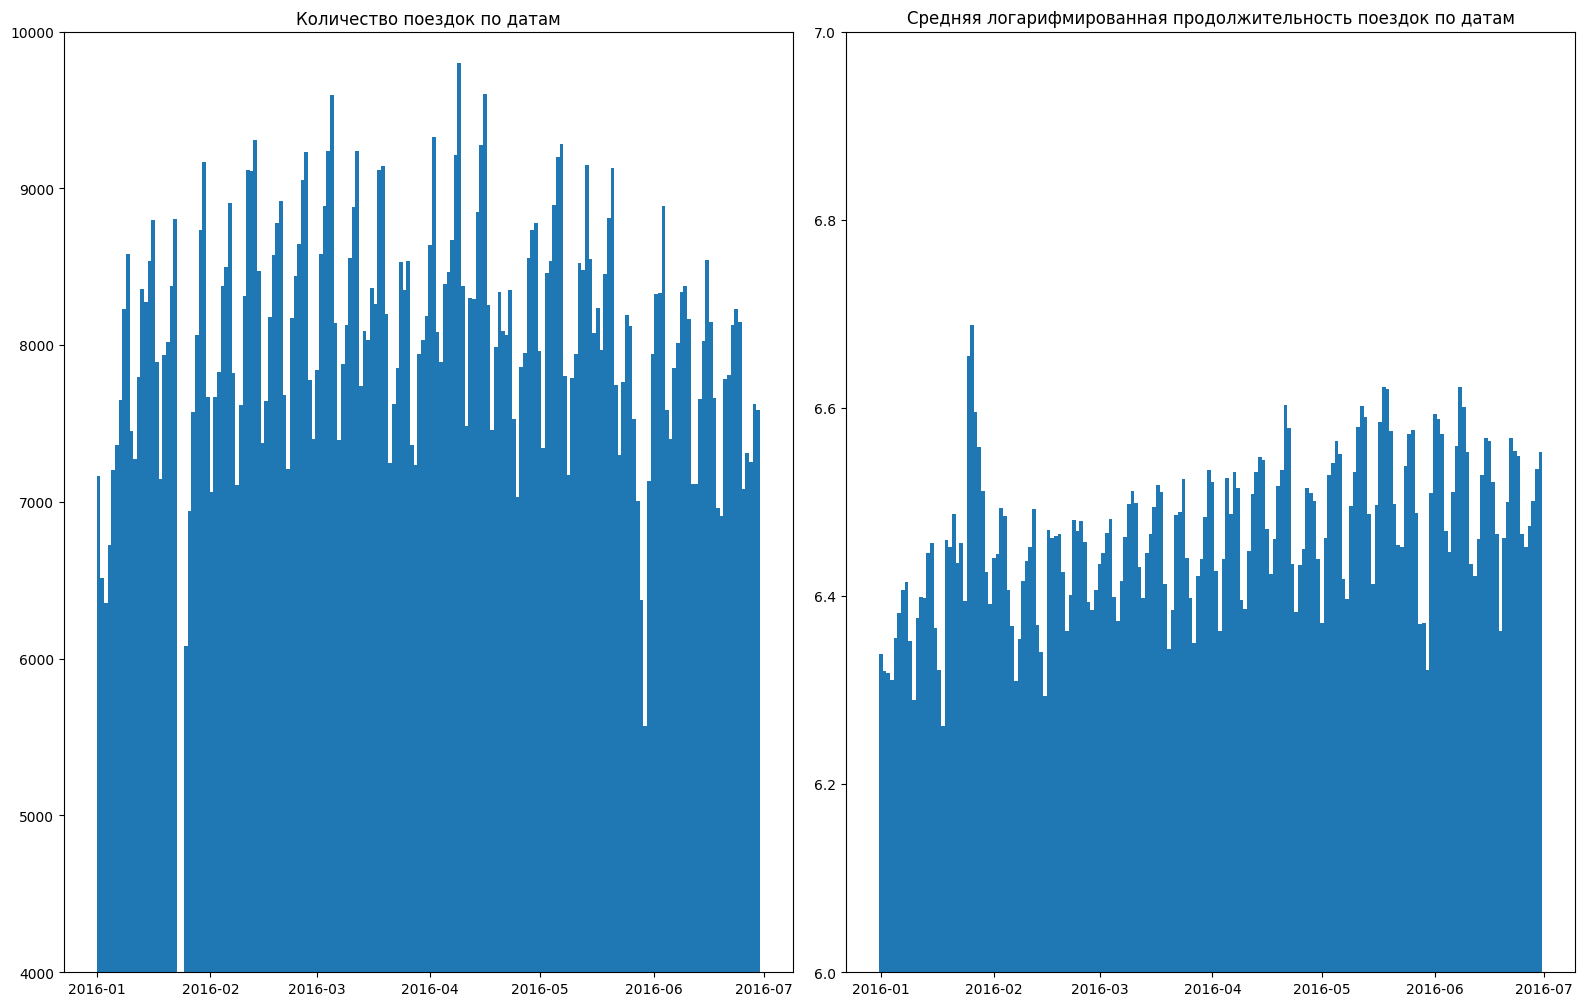

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())),
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title='Количество поездок по датам')
ax_2.set(title='Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


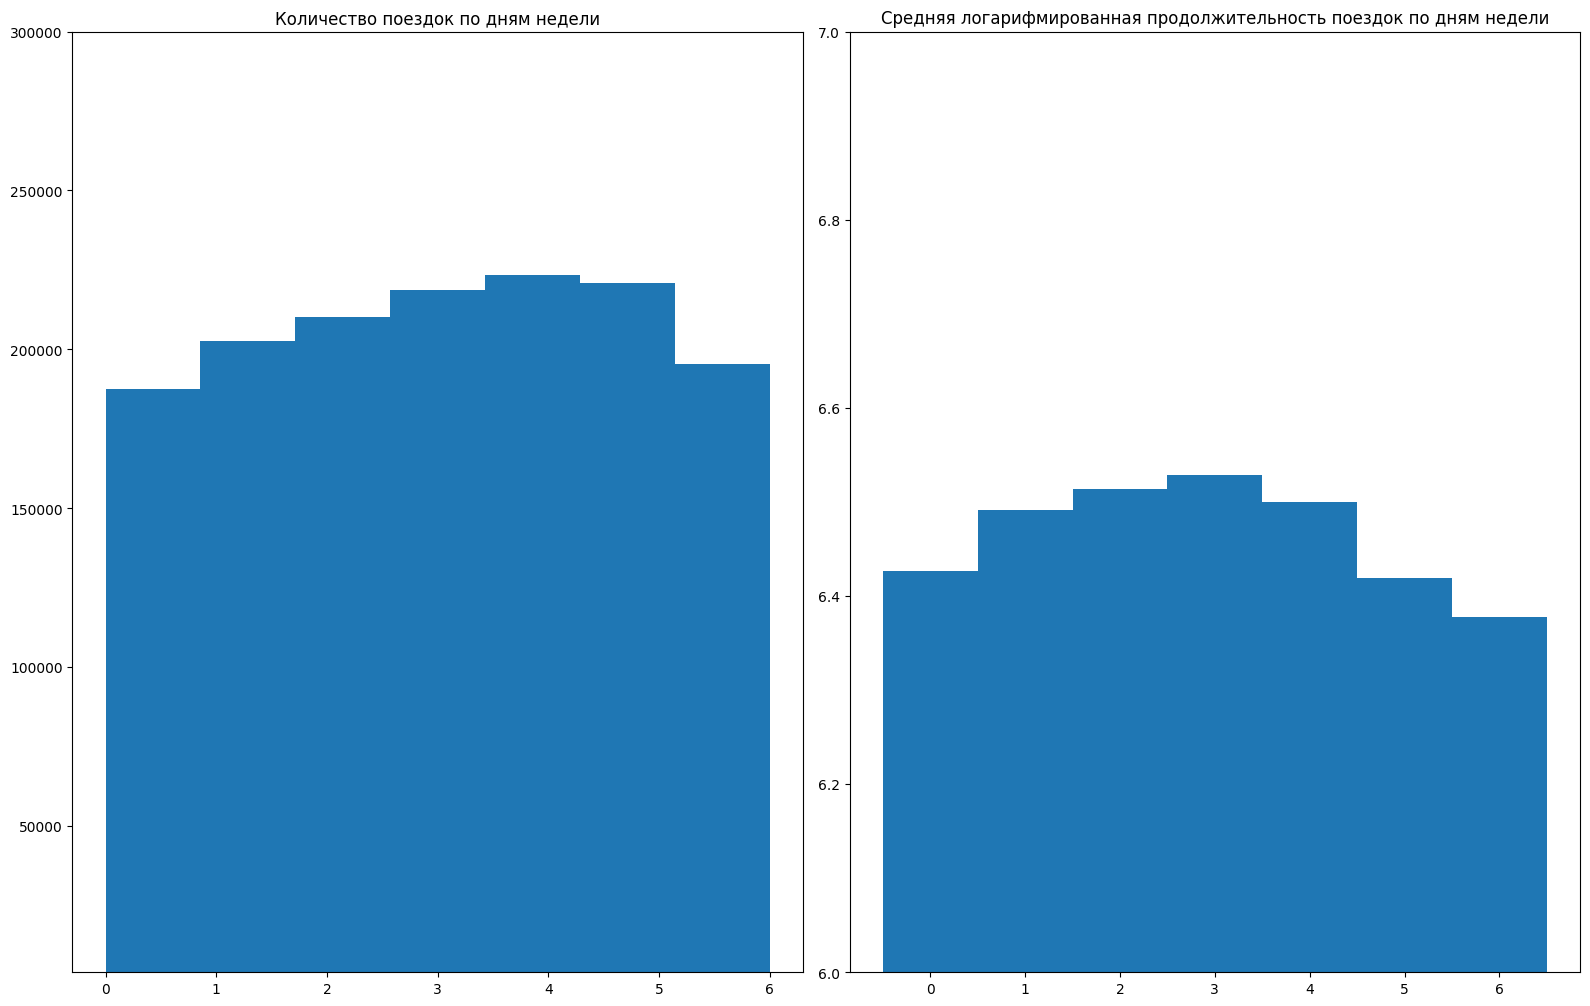

In [52]:
### Your code is here
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.day_of_week.unique().shape[0])
plt.ylim((4000, 300000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())),
        processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title='Количество поездок по дням недели')
ax_2.set(title='Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()



In [53]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'day'
    elif 17 <= hour < 22:
        return 'evening'
    else:
        return 'night'


processed_data['time_of_day'] = processed_data['hour'].apply(get_time_of_day)

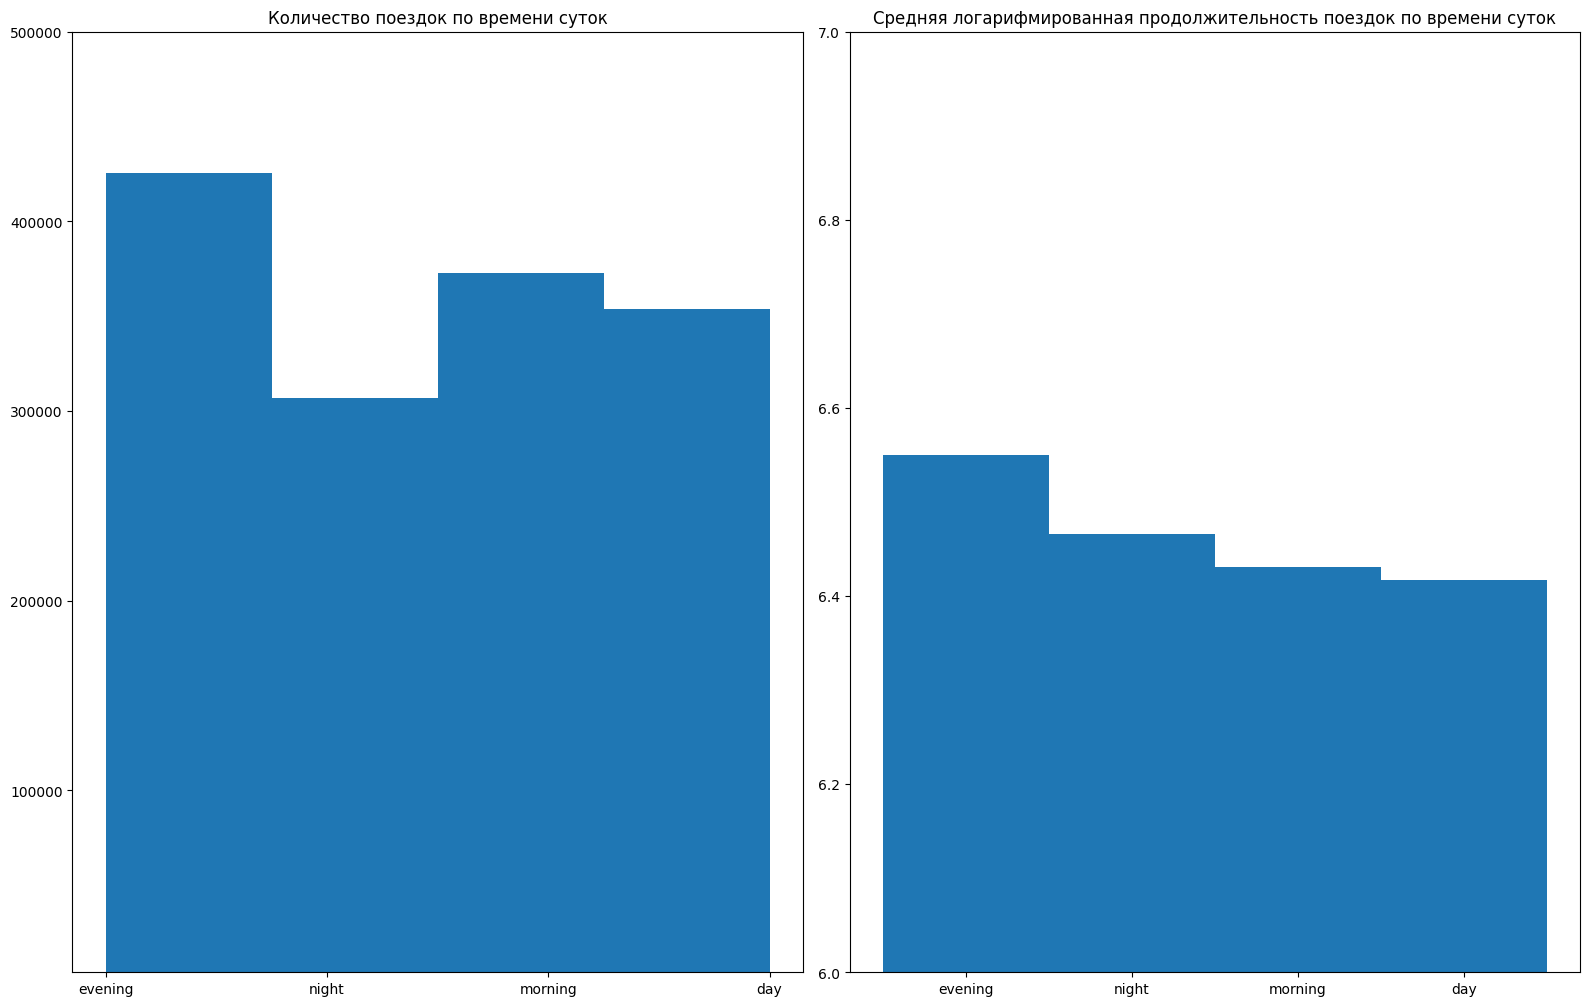

In [54]:
fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['time_of_day'], bins=processed_data.time_of_day.unique().shape[0])
plt.ylim((4000, 500000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(list(processed_data['time_of_day'].unique()),
        processed_data.groupby('time_of_day', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title='Количество поездок по времени суток')
ax_2.set(title='Средняя логарифмированная продолжительность поездок по времени суток')

plt.show()

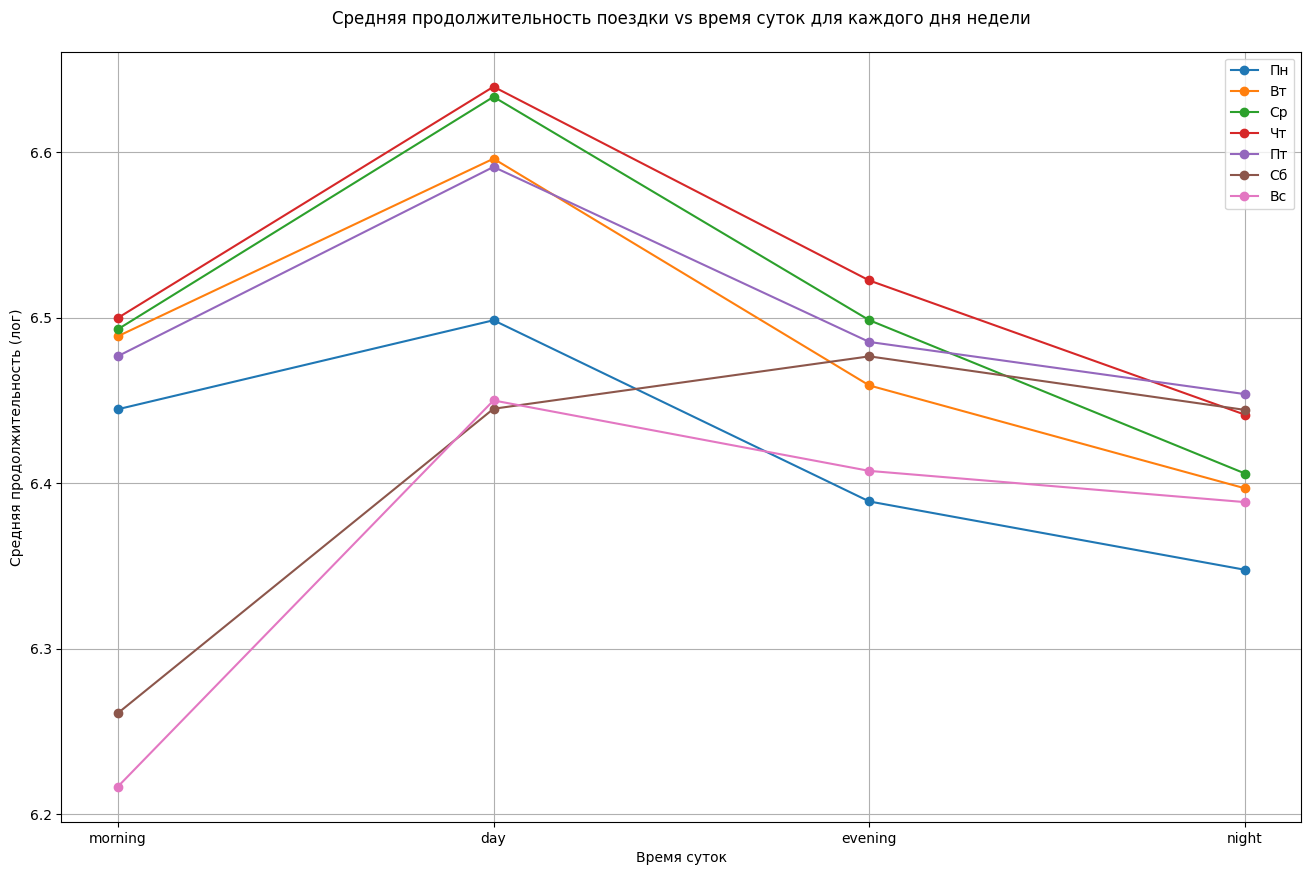

In [55]:
fig = plt.figure()

fig.set_size_inches(16, 10)

for month in sorted(processed_data['day_of_week'].unique()):
    # Группируем данные по времени суток и считаем среднее
    grouped_data = processed_data.loc[processed_data['day_of_week'] == month].groupby('time_of_day')[
        'log_trip_duration'].mean().reset_index()
    # Сортируем time_of_day в хронологическом порядке (если нужно)
    time_order = ['morning', 'day', 'evening', 'night']
    grouped_data['time_of_day'] = pd.Categorical(grouped_data['time_of_day'], categories=time_order, ordered=True)
    grouped_data = grouped_data.sort_values('time_of_day')
    # Строим график
    plt.plot(grouped_data['time_of_day'],
             grouped_data['log_trip_duration'],
             label=f'Day {month}',
             marker='o')

plt.title("Средняя продолжительность поездки vs время суток для каждого дня недели", pad=20)
plt.legend(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.xlabel('Время суток')
plt.ylabel('Средняя продолжительность (лог)')
plt.grid(True)
plt.show()

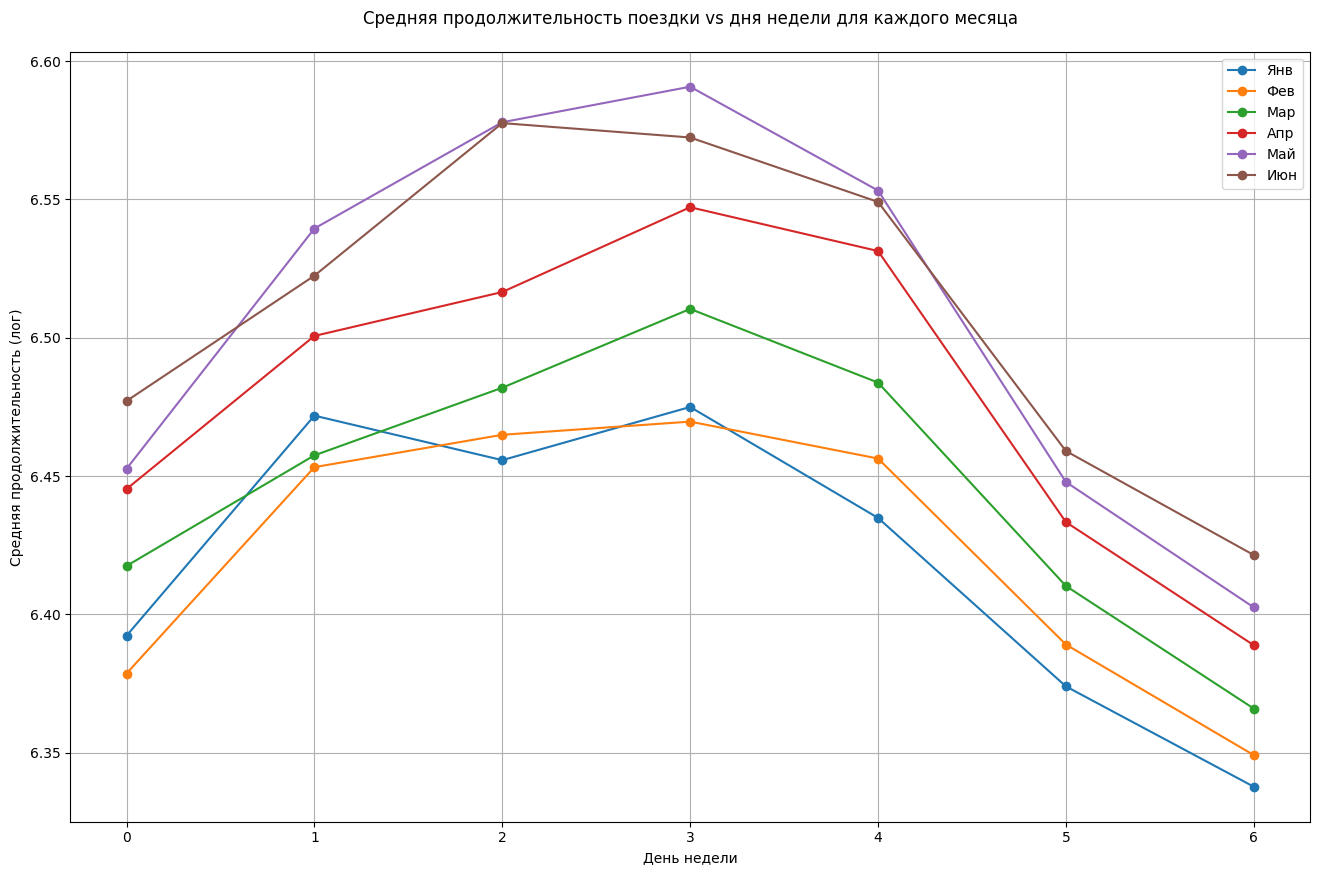

In [56]:
fig = plt.figure()

fig.set_size_inches(16, 10)

for month in sorted(processed_data['month'].unique()):
    # Группируем данные по времени суток и считаем среднее
    grouped_data = processed_data.loc[processed_data['month'] == month].groupby('day_of_week')[
        'log_trip_duration'].mean().reset_index()
    grouped_data = grouped_data.sort_values('day_of_week')
    # Строим график
    plt.plot(grouped_data['day_of_week'],
             grouped_data['log_trip_duration'],
             label=f'Day {month}',
             marker='o')

plt.title("Средняя продолжительность поездки vs дня недели для каждого месяца", pad=20)
plt.legend(['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн'])
plt.xlabel('День недели')
plt.ylabel('Средняя продолжительность (лог)')
plt.grid(True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x354e46ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x354e58220>,
 'boxes': [<matplotlib.lines.Line2D at 0x354e46a00>,
 'medians': [<matplotlib.lines.Line2D at 0x354e58760>,
 'fliers': [<matplotlib.lines.Line2D at 0x354e58a00>,
 'means': []}

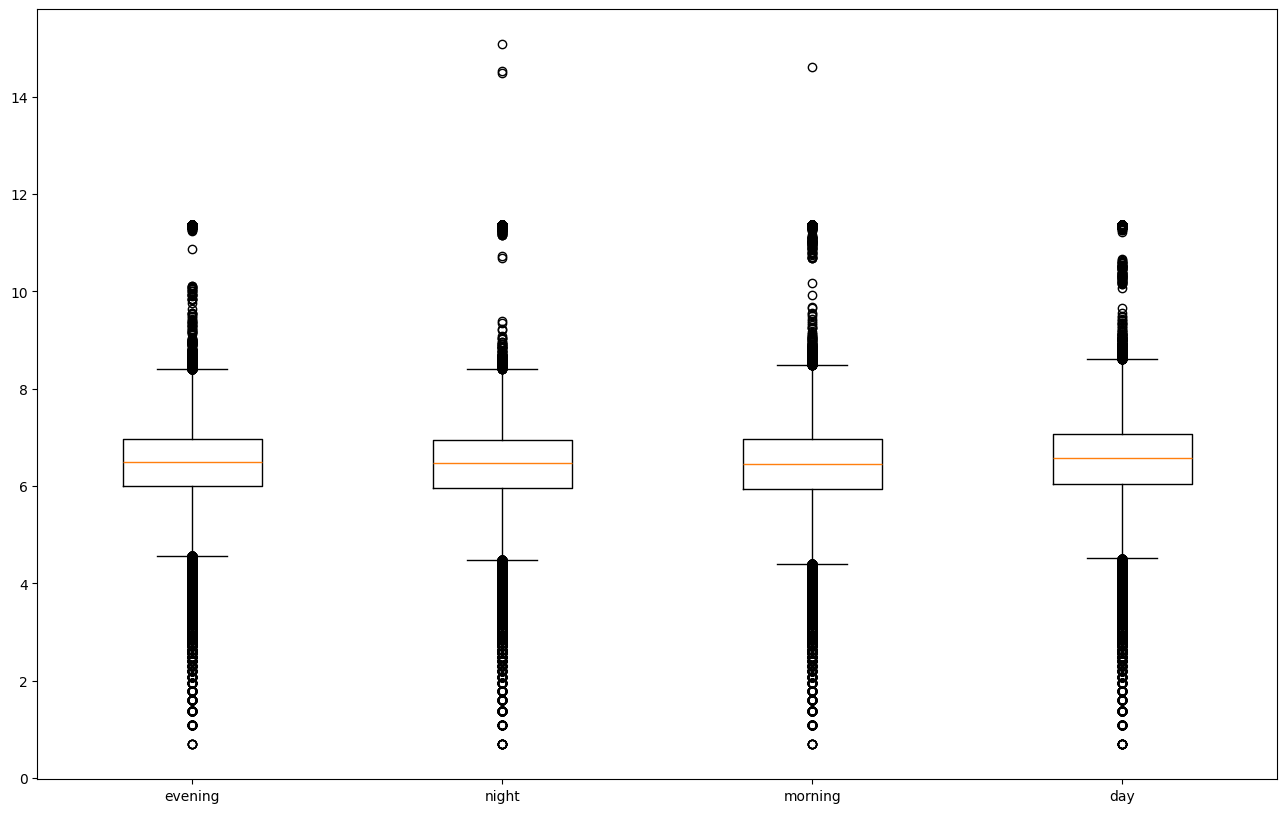

In [57]:
fig = plt.figure()
fig.set_size_inches(16, 10)

time_of_day_dict = {}

for time_of_day in processed_data['time_of_day'].unique():
    time_of_day_dict[time_of_day] = processed_data[processed_data['time_of_day'] == time_of_day]['log_trip_duration']

plt.boxplot(time_of_day_dict.values(),
            tick_labels=time_of_day_dict.keys())


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [58]:
### Создадим первый бинарный признак
### Your code is here
processed_data['date'] = pd.to_datetime(processed_data['date'])
processed_data['anomaly'] = np.where(processed_data['date'] == '2016-01-22', 1, 0)

In [59]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,time_of_day,anomaly
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,evening,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,night,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,morning,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,evening,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,day,0


In [60]:
frame = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot(index='hour', columns='day_of_week', values='log_trip_duration')
frame.head(20)
#frame.unstack().sort_values(ascending=False).head(20)

day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,6.328173,6.353598,6.361024,6.368642,6.433067,6.486600,6.465794
1,6.289221,6.316450,6.290582,6.287852,6.368686,6.417126,6.423073
2,6.260257,6.277271,6.226347,6.280400,6.297224,6.365256,6.353585
3,6.321038,6.241751,6.256435,6.272725,6.311585,6.323040,6.350705
4,6.325626,6.329338,6.284243,6.285450,6.369078,6.339929,6.325216
5,6.256471,6.140184,6.122148,6.193495,6.278671,6.357487,6.341709
6,6.184772,6.155556,6.162004,6.175040,6.198555,6.238505,6.280519
7,6.359147,6.371453,6.388129,6.383752,6.362452,6.169255,6.160052
8,6.498381,6.520274,6.527269,6.539392,6.500891,6.194081,6.112782


In [61]:
frame.unstack().sort_values(ascending=False).head(20)

day_of_week  hour
3            14      6.669526
             15      6.650622
2            15      6.647091
             11      6.644226
             13      6.640205
             14      6.638930
1            11      6.635141
3            11      6.635055
4            15      6.632537
3            16      6.630965
2            12      6.630905
3            12      6.623803
             13      6.620438
2            17      6.615679
1            14      6.614188
             12      6.609847
2            16      6.607306
             10      6.606604
3            10      6.605446
4            14      6.602534
dtype: float64

In [62]:
frame.unstack().sort_values(ascending=False).index[:10][1]

(np.int32(3), np.int32(15))

In [63]:
### Создадим второй бинарный признак
### Your code is here
frame = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot(index='hour', columns='day_of_week', values='log_trip_duration')
processed_data['traffic_jam'] = 0
for x in frame.unstack().sort_values(ascending=False).index[:10]:
    processed_data.loc[(processed_data.day_of_week == x[0]) & (processed_data.hour == x[1]), 'traffic_jam'] = 1

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [64]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [65]:
### Делаем OneHotEncoding и конкатим с processed_data
for col in ['day_of_week', 'hour', 'month']:
    onehot = pd.get_dummies(processed_data[col], drop_first=True)
    onehot.columns = [f"{col}_{x}" for x in onehot.columns]

    processed_data = pd.concat((processed_data, onehot), axis=1)
    processed_data = processed_data.drop(col, axis=1)

### Your code is here

In [66]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,time_of_day,anomaly,traffic_jam,day_of_week_1,day_of_week_2,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,evening,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
id2377394,0,930.399753,0,1.807119,6.498282,night,0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
id3858529,1,930.399753,0,6.392080,7.661527,morning,0,1,True,False,...,False,False,False,False,False,False,False,False,False,False
id3504673,1,930.399753,0,1.487155,6.063785,evening,0,0,False,True,...,True,False,False,False,False,False,False,True,False,False
id2181028,1,930.399753,0,1.189925,6.077642,day,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [68]:
### Your code is here
cols_to_check=['passenger_count', 'distance_km', 'log_trip_duration']
corr_matrix = processed_data[cols_to_check].corr()
display(corr_matrix)

,passenger_count,distance_km,log_trip_duration
passenger_count,1.000000,0.016596,0.027069
distance_km,0.016596,1.000000,0.573899
log_trip_duration,0.027069,0.573899,1.000000


In [74]:
processed_data = processed_data.drop('time_of_day', axis=1)
processed_data.head()

KeyError: "['time_of_day'] not found in axis"

In [75]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
x = processed_data.drop('log_trip_duration', axis=1)
y = processed_data['log_trip_duration']
from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [76]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [77]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
model_check = LinearRegression()
model_check.fit(x[sfs.get_feature_names_out()], y)

preds = model_check.predict(x[sfs.get_feature_names_out()])

np.mean((preds-y)**2)

np.float64(0.41540002340782534)